# **Importando librerías**

In [ ]:
import pandas as pd # Operación con Dataframes
import numpy as np # Cálculos numéricos
import re # Operación con expresiones regulares (unidades de texto)
# importar librería NLTK
import nltk
# del modulo nltk.corpus importar la función stopwords
from nltk.corpus import stopwords
# del modulo nltk.stem importar la función PorterStemmer
from nltk.stem import PorterStemmer
# importar Librería TextBlob
import textblob
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# Reporte de Clasificación
from sklearn.metrics import classification_report
# del modulo sklearn.feature_extraction.text importar la función CountVectorizer
# Convierte una colección de documentos de texto en una matriz de recuentos de tokens.
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# **Cargando el dataset y observando su composición.**

In [ ]:
# Cargando el conjunto de datos utilizando pandas
dataframe = pd.read_csv('/content/IMDB_Dataset.csv')

# visualizar primeros registros del dataset mediante .head de pandas
dataframe.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Renombramos las columnas mediante .columns de pandas
dataframe.columns = ['texto','sentimiento']

# visualizar últimos registros del dataset mediante .tail de pandas
dataframe.tail()

,texto,sentimiento
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
# Obteniendo la dimensión del dataset utilizando shape.
print("Dimensión del dataset:", dataframe.shape)
# mostraremos el registro almacenado en el índice definido de la columna "texto" (p.e. 2)
dataframe['texto'][2]

Dimensión del dataset: (50000, 2)


'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

# **Procesamiento de los datos.**

In [ ]:
# Removeremos las etiquetas html que contenga la columna texto del dataset
# Definimos función para aplicar sobre archivo de texto
def remover_html(text):
    # se define instancia para implementar .compile de re (señalando caracteres a remover entre'')
    remover = re.compile('<.*?>')
    # se pide substituir (remover) etiquetas html
    return re.sub(remover,'',text)
# Una vez definida la función la aplicaremos a la columna "texto" (corpus)
dataframe['texto'] = dataframe['texto'].apply(remover_html)
# mostrar primeros registros del dataset mediante .head de pandas
dataframe.head()

,texto,sentimiento
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Convirtiendo los datos a minúsculas.

In [ ]:
# Definiendo función para convertir el texto a minúsculas
# crear función minúsculas para aplicar a archivo de texto
def convertir_minusculas(text):
    # regresará como respuesta el texto en minúsculas
    return text.lower()

# Aplicar función a columna "texto" del dataset
dataframe['texto'] = dataframe['texto'].apply(convertir_minusculas)

# mostrar un número determinado de registros elegidos aleatoriamente mediante .sample de pandas
dataframe.sample(5)

,texto,sentimiento
45867,a young theater actress reluctantly accepts he...,positive
17132,"this is no art-house film, it's mainstream ent...",positive
35159,i could only get through about 25 mins of it. ...,negative
6112,with the plethora of repetitive and derivative...,negative
41114,the only riddle in this film was how it ever g...,negative


Removiendo los caracteres especiales.

In [ ]:
# Definiendo función para remover caracteres especiales del texto
# crear función remover_no_alfanumericos para aplicar a archivo de texto
# se define que la función escaneará el texto por cada registro (x) y si los caracteres son
# alfanuméricos los mantendrá, de lo contrario, serán removidos
def remover_no_alfanumericos(text):
    x = ''
    for i in text:
        if i.isalnum():
            x = x+i
        else:
            x = x + ' '
    return x

# Aplicar función a columna "texto" del dataset
dataframe['texto'] = dataframe['texto'].apply(remover_no_alfanumericos)

# mostrar primeros registros del dataset
dataframe.head()

,texto,sentimiento
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there s a family where a little boy ...,negative
4,petter mattei s love in the time of money is...,positive


Removiendo las palabras vacías utilizando la librería nltk.

In [ ]:
import nltk
nltk.download('stopwords')
# Definiendo función para remover stopwords del texto con nltk
# crear función remover_stopwords para aplicar a archivo de texto
# se define que la función escaneará el texto por cada registro (x) y si las palabras
# NO están en el diccionario Stopwords de NLTK se mantendrán en la lista, de lo contrario
# serán removidas
def remover_stopwords(text):
    x = []
    for i in text.split():
        if i not in stopwords.words('english'):
            x.append(i)

    y = x[:]
    x.clear()
    return y

# Aplicar función a columna "texto" del dataset
dataframe['texto'] = dataframe['texto'].apply(remover_stopwords)
# mostrar primeros registros del dataset
dataframe.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,texto,sentimiento
0,"[one, reviewers, mentioned, watching, 1, oz, e...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, family, little, boy, jake, thinks,...",negative
4,"[petter, mattei, love, time, money, visually, ...",positive


In [ ]:
# del modulo nltk.stem importar la función PorterStemmer
from nltk.stem import PorterStemmer

# Definir función derivar_palabras en el archivo de texto
def derivar_palabras(text):
    # crear instancia para la derivación (tipo PorterStemmer de NLTK)
    ps = PorterStemmer()

    # Lista para colectar las palabras derivadas
    palabras_derivadas = []

    # búcle para aplicar la derivación a cada palabra en el texto
    for word in text:
        # almacenar palabras derivadas a la lista creada
        palabras_derivadas.append(ps.stem(word))

    return palabras_derivadas

# Aplicar función a columna "texto" del dataset
dataframe['texto'] = dataframe['texto'].apply(derivar_palabras)

# visualizar texto procesado
dataframe['texto']

0        [one, review, mention, watch, 1, oz, episod, h...
1        [wonder, littl, product, film, techniqu, unass...
2        [thought, wonder, way, spend, time, hot, summe...
3        [basic, famili, littl, boy, jake, think, zombi...
4        [petter, mattei, love, time, money, visual, st...
                               ...                        
49995    [thought, movi, right, good, job, creativ, ori...
49996    [bad, plot, bad, dialogu, bad, act, idiot, dir...
49997    [cathol, taught, parochi, elementari, school, ...
49998    [go, disagre, previou, comment, side, maltin, ...
49999    [one, expect, star, trek, movi, high, art, fan...
Name: texto, Length: 50000, dtype: object

Quitando los espacios en blanco.

In [ ]:
# Definir función para remover comas y quitar múltiples espacios en blanco entre las palabras
# definir función unir_palabras para aplicar a la lista de entrada
def tabular_espacios(list_input):
    # Regresar texto sin comas o espacios en blanco múltiples entre palabras
    return ' '.join(list_input)

# aplicar función al texto
dataframe['texto'] = dataframe['texto'].apply(tabular_espacios)
# visualizar texto procesado
dataframe['texto']

0        one review mention watch 1 oz episod hook righ...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic famili littl boy jake think zombi closet...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job creativ origin fir...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    go disagre previou comment side maltin one sec...
49999    one expect star trek movi high art fan expect ...
Name: texto, Length: 50000, dtype: object

In [ ]:
# con .to_csv de pandas guaradremos la copia (nombre archivo, encabezados de columnas, índice)
dataframe.to_csv('IMDB_dep.csv', header=True, index= False)

In [ ]:
# Cargar Dataset (corpus) depurado
dataframe_depurado = pd.read_csv('/content/IMDB_dep.csv')

# mostrar los primeros registros
dataframe_depurado.head()

,texto,sentimiento
0,one review mention watch 1 oz episod hook righ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive


A continuación extraemos 5000 datos que serán los que se usarán para el desarrollo de la actividad, divididos en 2500 opiniones positivas y 2500 opiniones negativas.

In [ ]:
positive_reviews = dataframe_depurado[dataframe_depurado['sentimiento'] == 'positive'].sample(n=2500, random_state=42)
negative_reviews = dataframe_depurado[dataframe_depurado['sentimiento'] == 'negative'].sample(n=2500, random_state=42)

# Concatenar las críticas positivas y negativas para formar el nuevo conjunto de datos
data_balanced = pd.concat([positive_reviews, negative_reviews])

# **TextBlob**

En este apartado se utilizará la librería TextBlob para la realización del análisis de sentimiento.

In [ ]:
# Creando una copia de seguridad
# Leyendo el conjunto de datos
textb_data=data_balanced.copy()
# mostrar primeros registros
textb_data.head()

,texto,sentimiento
13886,know film meager rate imdb film accompani curi...,positive
48027,long time seem like good canadian actor head s...,positive
19536,terri gilliam david peopl team creat one intel...,positive
27232,say anti establish film produc time colourless...,positive
28001,movi made 48 year end civil war like anticip 5...,positive


In [ ]:
# Crear listas vacias para almacenar los puntajes de polaridad, subjetividad y la
# sumatoria total (Etiqueta de sentimiento)
subjetividad=[] # Contendrá el valor de subjetividad de la reseña extraído por TextBlob
sentimiento_score=[] # Contendrá el puntaje de polaridad extraído por TextBlob
sentimiento=[] # Contendrá las "etiquetas de sentimiento" (Negativo o Positivo) que se establecerán
                # según el puntaje de polaridad del registro
# Crearemos función de búcle para obtener la polaridad y la subjetividad con TextBlob
# para cada valor en los registros de la columna "texto" del dataset
for i in textb_data['texto'].values:
    # Instancia para aplicar funciones de TextBlob
    reseña = textblob.TextBlob(i)
    # Obtener puntaje
    sentimiento_score.append(reseña.sentiment[0])
    # Si el puntaje es = < 0
    if reseña.sentiment[0]<=0:
        # Agregar a la columna sentimiento etiqueta "Negativo"
        sentimiento.append('Negativo')
    # además, si el puntaje es > =
    elif reseña.sentiment[0]>0:
        # Agregar a la columna sentimiento etiqueta "Positivo"
        sentimiento.append('Positivo')
    # agregar a la columna subjetividad el puntaje de subjetividad extraído por TextBlob
    subjetividad.append(reseña.sentiment[1])

In [ ]:
# Crearemos en el dataset tres columnas
textb_data['Puntaje de polaridad']=sentimiento_score
textb_data['Subjetividad']=subjetividad
textb_data['Etiqueta de sentimiento']=sentimiento

# mostrar dataset
textb_data.head()

,texto,sentimiento,Puntaje de polaridad,Subjetividad,Etiqueta de sentimiento
13886,know film meager rate imdb film accompani curi...,positive,0.089185,0.281609,Positivo
48027,long time seem like good canadian actor head s...,positive,0.161538,0.357692,Positivo
19536,terri gilliam david peopl team creat one intel...,positive,0.143131,0.497995,Positivo
27232,say anti establish film produc time colourless...,positive,0.049502,0.306818,Positivo
28001,movi made 48 year end civil war like anticip 5...,positive,0.225926,0.575926,Positivo


In [ ]:
# Graficar distribución de los valores positivos y negativos
import plotly.express as px
px.histogram(data_frame=textb_data,x='Puntaje de polaridad',color='Etiqueta de sentimiento')

In [ ]:
# Visualizar número de negativos y positivos en el dataset utilizando value_counts.
textb_data['sentimiento'].value_counts()

sentimiento
positive    2500
negative    2500
Name: count, dtype: int64

In [ ]:
# Visualizar número de negativos y positivos obtenidos de TextBlob
textb_data['Etiqueta de sentimiento'].value_counts()

Etiqueta de sentimiento
Positivo    3784
Negativo    1216
Name: count, dtype: int64

In [ ]:
# Codificaremos numericamente las etiquetas para comparar los resultados
textb_data['sentimiento'].replace({'positive':1,'negative':0},inplace = True)
textb_data['Etiqueta de sentimiento'].replace({'Positivo':1,'Negativo':0},inplace = True)

# mostrar dataset luego de la codificación
textb_data.head()

,texto,sentimiento,Puntaje de polaridad,Subjetividad,Etiqueta de sentimiento
13886,know film meager rate imdb film accompani curi...,1,0.089185,0.281609,1
48027,long time seem like good canadian actor head s...,1,0.161538,0.357692,1
19536,terri gilliam david peopl team creat one intel...,1,0.143131,0.497995,1
27232,say anti establish film produc time colourless...,1,0.049502,0.306818,1
28001,movi made 48 year end civil war like anticip 5...,1,0.225926,0.575926,1


Obtenemos el valor de la métrica "accuracy".

In [ ]:
accuracy_score(textb_data['sentimiento'], textb_data['Etiqueta de sentimiento'])*100

65.16

Obtenemos la matriz de confusión correspondiente al modelo TextBlob.

[[ 987 1513]
 [ 229 2271]]


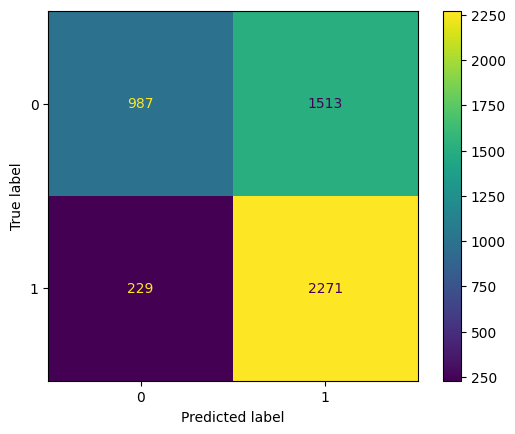

In [ ]:
y_true = textb_data['sentimiento']
y_pred = textb_data['Etiqueta de sentimiento']
confusion_matrix(y_true, y_pred)
print(confusion_matrix(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

Obtenemos el reporte de clasificación utilizando la matriz de confusión.

In [ ]:
print(classification_report(textb_data['sentimiento'], textb_data['Etiqueta de sentimiento']))

              precision    recall  f1-score   support

           0       0.81      0.39      0.53      2500
           1       0.60      0.91      0.72      2500

    accuracy                           0.65      5000
   macro avg       0.71      0.65      0.63      5000
weighted avg       0.71      0.65      0.63      5000



**Naive Bayes**

En este apartado se utilizará la librería Naive Bayes para la realización del análisis de sentimiento.

In [ ]:
# Crearemos una copia del dataset depurado para su trabajo en este apartado
naive_data=data_balanced.copy()

# mostrar dataframe
naive_data.head()

,texto,sentimiento
13886,know film meager rate imdb film accompani curi...,positive
48027,long time seem like good canadian actor head s...,positive
19536,terri gilliam david peopl team creat one intel...,positive
27232,say anti establish film produc time colourless...,positive
28001,movi made 48 year end civil war like anticip 5...,positive


In [ ]:
# crearemos una instancia "X" para seleccionar solo los valores del corpus (columna texto)
X = naive_data.iloc[:,0:1].values

# mostrar dimensión de "X"
print("Tenemos 5.000 registros y 1 columna", X.shape)

Tenemos 5.000 registros y 1 columna (5000, 1)


Se define un máximo de características igual a 500.

In [ ]:
# del modulo sklearn.feature_extraction.text importar la función CountVectorizer
# Convierte una colección de documentos de texto en una matriz de recuentos de tokens.
from sklearn.feature_extraction.text import CountVectorizer

# crear instancia para aplicar función (máximo de características = 500)
cv  = CountVectorizer(max_features = 500)

# mediante el objeto "X" aplicaremos la trasformación del corpus
X = cv.fit_transform(naive_data['texto']).toarray()
X[:1]

array([[ 0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  2,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  2,  2,
         0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 18,
         0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

In [ ]:
# dimensión de X
X.shape

(5000, 500)

In [ ]:
# definir eje y para dividir el set para entrenamiento y prueba
y = naive_data.iloc[:,-1].values
y[:10]

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive'],
      dtype=object)

División del dataset.

In [ ]:
# dividir el dataframe en set de entrenamiento y set de prueba
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

Características de las diemnsiones del dataset ya dividido.

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 500)
(1500, 500)
(3500,)
(1500,)


In [ ]:
# crear instancia para implementar algortimos Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_predmb = nb_model.predict(X_test)

# visualizar resultados de predicción de los modelos
print(y_predmb[:20])

['negative' 'positive' 'positive' 'positive' 'positive' 'negative'
 'negative' 'positive' 'negative' 'negative' 'positive' 'negative'
 'negative' 'positive' 'negative' 'positive' 'positive' 'positive'
 'negative' 'negative']


Se obtiene el valor de la métrica "accuracy".

In [ ]:
# aplicar métrica de evaluación a los modelos
print('Accuracy score of MultinomialNB',accuracy_score(y_test,y_predmb)*100)

Accuracy score of MultinomialNB 82.93333333333334


Obteniendo la matriz de confusión para el modelo Naive Bayes.

[[606 143]
 [113 638]]


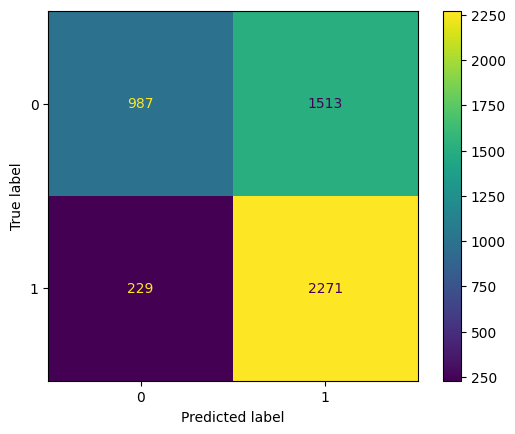

In [ ]:
# crear y mostrar matriz de confusión
y_true = y_test
y_pred = y_predmb
confusion_matrix(y_true, y_pred)
print(confusion_matrix(y_true, y_pred))

# Crear Grafica de la matríz
y_pred = nb_model.predict(X_test)
cmatriz = confusion_matrix(y_test, y_pred)
cmatriz_display = ConfusionMatrixDisplay(cm).plot()

Reporte de clasificación del modelo Naive Bayes.

In [ ]:
# crear y mostrar el reporte de clasificación
print(classification_report(y_test, y_predmb))

              precision    recall  f1-score   support

    negative       0.84      0.81      0.83       749
    positive       0.82      0.85      0.83       751

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500



Empleando nuevamente el modelo Naive Bayes pero esta vez con un máximo de características igual a 1500.

In [ ]:
# crear instancia para aplicar función (máximo de características = 1500)
cv  = CountVectorizer(max_features = 1500)

In [ ]:
X = cv.fit_transform(naive_data['texto']).toarray()
X[:1]

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# dimensión de X
X.shape

(5000, 1500)

In [ ]:
# definir eje y para dividir el set para entrenamiento y prueba
y = naive_data.iloc[:,-1].values
y[:10]

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive'],
      dtype=object)

In [ ]:
# dividir el dataframe en set de entrenamiento y set de prueba
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 1500)
(1500, 1500)
(3500,)
(1500,)


In [ ]:
# crear instancia para implementar algortimos Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_predmb = nb_model.predict(X_test)

# visualizar resultados de predicción de los modelos
print(y_predmb[:20])

['positive' 'negative' 'positive' 'positive' 'negative' 'positive'
 'negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'positive' 'positive']


In [ ]:
# aplicar métrica de evaluación a los modelos
print('Accuracy score of MultinomialNB',accuracy_score(y_test,y_predmb)*100)

Accuracy score of MultinomialNB 84.06666666666666


[[636 117]
 [122 625]]


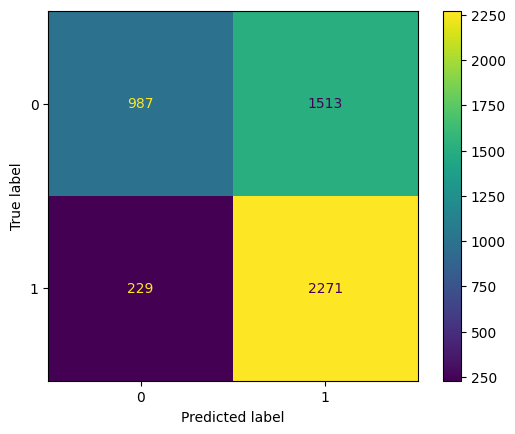

In [ ]:
# crear y mostrar matriz de confusión
y_true = y_test
y_pred = y_predmb
confusion_matrix(y_true, y_pred)
print(confusion_matrix(y_true, y_pred))

# Crear Grafica de la matríz
y_pred = nb_model.predict(X_test)
cmatriz = confusion_matrix(y_test, y_pred)
cmatriz_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
# crear y mostrar el reporte de clasificación
print(classification_report(y_test, y_predmb))

              precision    recall  f1-score   support

    negative       0.84      0.84      0.84       753
    positive       0.84      0.84      0.84       747

    accuracy                           0.84      1500
   macro avg       0.84      0.84      0.84      1500
weighted avg       0.84      0.84      0.84      1500

